In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg') #BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #BGR轉RGB

## 1-1. cluster with only RGB values

In [4]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

(1024, 1024, 3)
[[107.82829393  95.68687856  71.70468783]
 [163.23246826 197.75608525 120.59196083]]
[[160.6662333  204.72927786 114.7258091 ]
 [ 57.77164804  54.71825619  45.94183958]
 [143.78318579 128.15803163  97.10149582]
 [184.06196406 182.85669678 165.16643112]]
[[154.67437371 192.73350628 110.88831624]
 [ 38.07176287  40.34465143  40.92334282]
 [163.40511491 211.83672989 117.65963479]
 [114.4767012   98.74040613  67.1708247 ]
 [198.07196159 199.15430537 186.59249886]
 [148.66654245 132.99439    103.10705329]
 [169.68926688 163.6257155  141.75538031]
 [220.28378834 190.82204247  36.8537243 ]]
[[165.87798156 215.9830288  116.89442563]
 [125.06280193 112.28350089  80.58906733]
 [ 94.94950623  78.35912409  47.59270073]
 [180.55036719 179.81504436 168.5797852 ]
 [155.9681123  192.91491737 110.10688269]
 [ 30.75492929  39.3975431   45.99267059]
 [153.5348723  137.59076621 110.48185986]
 [201.57607261 209.31666667 167.30165017]
 [167.40495186 144.20403485  92.28436497]
 [234.02853403 

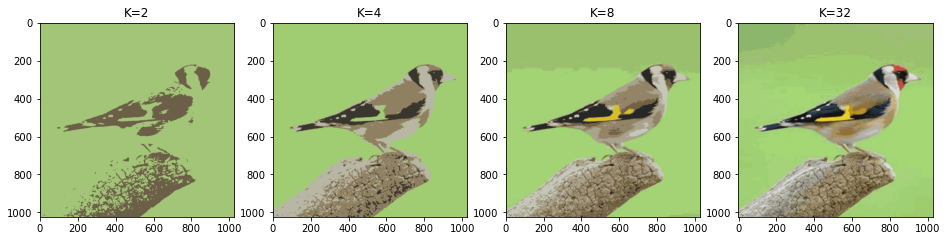

In [21]:
h, w, c = img.shape
print(img.shape)
#長, 寬, RGB三色

Z = img.reshape((-1,3)) 
Z.shape
'''
np.reshape(A,(a,b)) 
A:需要被重新組合的陣列
(a,b): 各個維度的長度。比如要想展開成二維陣列，那麼(a,b)就是展開成a行b列。如果某一個維度長度不確定，可以用-1代替。
'''

Ka = [2, 4, 8, 32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ka):
    label, center = km_clust(Z, K)
    center = np.uint8(center[:,:])#將RGB轉成整數
    res = center[label.flatten()] #.flatten()降成一維
    res = res.reshape(img.shape) #變成可視化
    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)
'''    
假設
center = [ [163 197 120], [107  95  71] ] -->RGB值，也是一個中心點
label = [0, 1, 0, 0, 1]
center[label]使用for迴圈後，意思是將label視為index值，若label=0，則寫入[163 197 120]，反之則寫入[107  95  71]

res.shape 原本是 (1048576, 3)
res.reshape(img.shape) 變成 (1024, 1024, 3)
'''

## 1-2. cluster with RGB values and the location

[[156.5124995  180.42847845 110.46296094 511.53036194 768.43072968]
 [154.39009683 186.37786562 116.95869782 511.46985813 256.43157195]]
[[157.34983637 183.2642291  111.45230267 766.14629597 768.85126672]
 [151.73976174 193.85762849 111.21207479 256.75013148 254.32591331]
 [157.12045801 178.92992818 122.80452968 769.03380842 256.71312286]
 [155.58455017 177.58893039 109.43128808 254.45457424 766.16417449]]


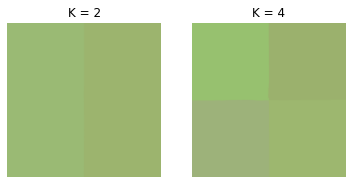

In [28]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

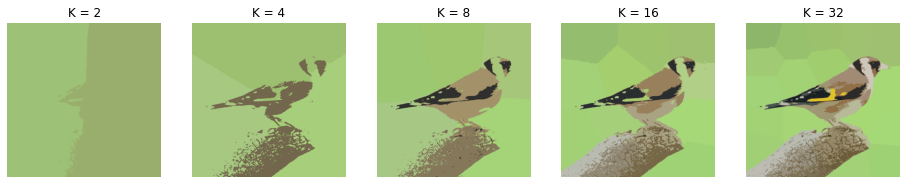

[[152.83708916 174.10418302 107.98473836 133.55543206 186.94645347]
 [158.41730036 194.00600396 120.2508063  121.41222452  60.66786916]]
[[114.21846975 102.11437569  76.05280585 173.21770043 137.87039681]
 [167.57394438 206.10376387 123.01952287 168.95043215 211.93033101]
 [157.90146021 192.83187275 112.33353889  45.80462757 124.15207405]
 [166.1340442  199.77685115 129.68381689 168.05921487  51.44165997]]
[[156.22048763 200.98865306 114.54948574  67.56465374  41.88109819]
 [162.79312423 145.33144671 106.04879755 124.39491311 156.57089095]
 [164.58643391 211.38636018 120.32717314 194.62149173 212.39405116]
 [166.64397695 198.49514821 122.24162687  56.64214806 220.73352854]
 [ 47.19603118  48.07409496  45.97836119 116.65593913 136.734508  ]
 [158.04236604 199.64970621 110.68283386  45.07000927 126.04208524]
 [132.11463865 119.79118564  90.18471485 218.45300114 127.91069711]
 [167.98191181 200.42593934 133.58970603 188.1172226   53.01791481]]


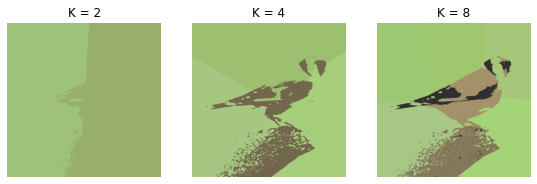

In [30]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()